# Лабораторная работа 2. Классификация текстов на основе вхождения в документ словарных слов

**Задание 1.** Загрузите в датафрейм новостной датасет `lenta_ru_news_filtered.csv`, собранный на базе корпуса `lenta.ru v1.0`. В датасете каждая новость описывается следующими полями:
* **url** - адрес новости на сайте `lenta.ru`,
* **topic** - тема новости,
* **title** - заголовок новости,
* **text** - текст новости.

Ответьте на следуюшие вопросы:
1. Сколько всего новостных текстов?
2. На какие темы встречаются новости?
3. Сколько новостных текстов в каждой теме?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
news = pd.read_csv('/content/drive/MyDrive/NLP/labs/nlp_lab2/lenta_ru_news_filtered.csv')

In [7]:
news.head(5)

,Unnamed: 0,url,topic,title,text
0,34,https://lenta.ru/news/2018/12/15/putinrap/,Культура,Путин предостерег от запретов рэп-концертов,"Президент России Владимир Путин, выступая на з..."
1,52,https://lenta.ru/news/2018/12/15/cirk/,Культура,Путин пообещал поразбираться с Cirque du Solei...,Владимир Путин пообещал разобраться с открытие...
2,53,https://lenta.ru/news/2018/12/15/asomov/,Культура,Умер актер «Кривого зеркала»,В Ташкенте скончался участник юмористической т...
3,57,https://lenta.ru/news/2018/12/14/zinchuk/,Культура,Зинчук рассказал подробности аварии и призвал ...,"Гитарист-виртуоз и композитор Виктор Зинчук, г..."
4,63,https://lenta.ru/news/2018/12/14/bydlo/,Культура,За сравнившего с быдлом зрителей актера «Униве...,"Коллеги актера Андрея Гайдуляна, известного по..."


In [8]:
news.tail(5)

,Unnamed: 0,url,topic,title,text
3995,19915,https://lenta.ru/news/2018/07/09/zakladnaya/,Экономика,Отсутствие подзаконных актов помешало банкам р...,Российские банки пока не получили возможности ...
3996,19931,https://lenta.ru/news/2018/07/09/tram/,Экономика,Россиянам представили «секретный» трамвай,"«Уралвагонзавод» (УВЗ), входящий в состав «Рос..."
3997,19935,https://lenta.ru/news/2018/07/09/poroh/,Экономика,Украина захотела спасти Европу от «Северного п...,"Президент Украины Петр Порошенко считает, что ..."
3998,19941,https://lenta.ru/news/2018/07/09/cb_like_fcb/,Экономика,Центробанку разрешат проводить обыски,Банк России может получить разрешение беспрепя...
3999,19944,https://lenta.ru/news/2018/07/09/vodka/,Экономика,Россиян оставили без дешевой водки,Минфин уравнял минимальную розничную цену (МРЦ...


In [9]:
uniq_topic = news['topic'].unique()
uniq_topic

array(['Культура', 'Экономика'], dtype=object)

In [12]:
# 1. Сколько всего новостных текстов?
print("1. Всего новостных текстов:", len(news))

1. Всего новостных текстов: 4000


In [13]:
# 2. На какие темы встречаются новости?
uniq_topic = news['topic'].unique()
print("\n2. Темы новостей:", uniq_topic)


2. Темы новостей: ['Культура' 'Экономика']


In [14]:
# 3. Сколько новостных текстов в каждой теме?
topic_counts = news['topic'].value_counts()
print("\n3. Количество текстов по темам:")
print(topic_counts)


3. Количество текстов по темам:
topic
Культура     2000
Экономика    2000
Name: count, dtype: int64


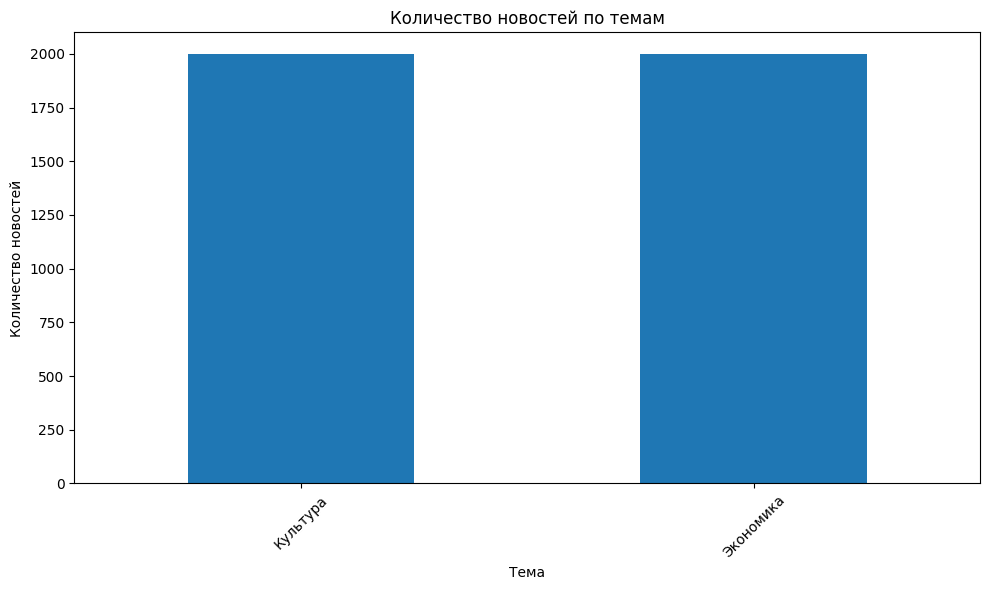

In [15]:
# График распределения текстов по темам
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Количество новостей по темам')
plt.xlabel('Тема')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Задание 2.** Выполните предобработку новостных текстов в виде:
- приведение к нижнему регистру,
- удаление знаков пунктуации.

**(!) Далее в лабораторной работе задания выполняются с полученными обработанными текстами**.

Разделите датасет на обучающую и тестовую части в соотношении 80% к 20%. Выведите диаграммы, отражающие количество текстов по каждой теме в каждой из частей.

In [18]:
from sklearn.model_selection import train_test_split
import re

# Функция предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление знаков пунктуации
    text = re.sub(r'[^\w\s]', ' ', text)
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Применение предобработки
news['processed_text'] = news['text'].apply(preprocess_text)

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(news, test_size=0.2, random_state=42, stratify=news['topic'])

print(f"Обучающая выборка: {len(train_df)} текстов")
print(f"Тестовая выборка: {len(test_df)} текстов")

Обучающая выборка: 3200 текстов
Тестовая выборка: 800 текстов


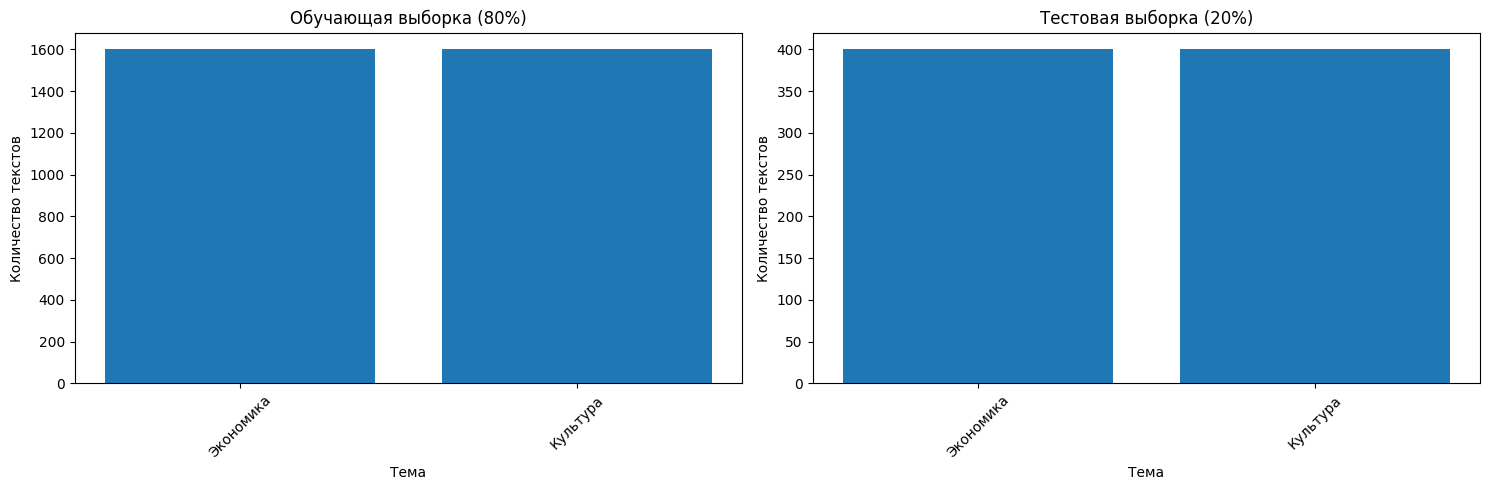

In [19]:
# Диаграммы распределения тем в обучающей и тестовой выборках
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Обучающая выборка
train_counts = train_df['topic'].value_counts()
ax1.bar(train_counts.index, train_counts.values)
ax1.set_title('Обучающая выборка (80%)')
ax1.set_xlabel('Тема')
ax1.set_ylabel('Количество текстов')
ax1.tick_params(axis='x', rotation=45)

# Тестовая выборка
test_counts = test_df['topic'].value_counts()
ax2.bar(test_counts.index, test_counts.values)
ax2.set_title('Тестовая выборка (20%)')
ax2.set_xlabel('Тема')
ax2.set_ylabel('Количество текстов')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Задание 3.** Подсчитайте частоту встречаемости слов предобработанных новостных текстов `обучающей` части датафрейма. Какие слова употребляются наиболее часто вцелом в этих новостных текстах, а какие слова употребляются в этих же новостных текстах относительно тем (выведите топ-`50` слов для каждого случая)?

Нахождение частот слов в новостных текстах датафрейма можно выполнять посредством инструмента `FreqDist` библиотеки `NLTK`.

Например:
```
df['text'].apply(lambda x: nltk.FreqDist(nltk.word_tokenize(x)))
```

In [23]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Скачиваем необходимые данные для nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

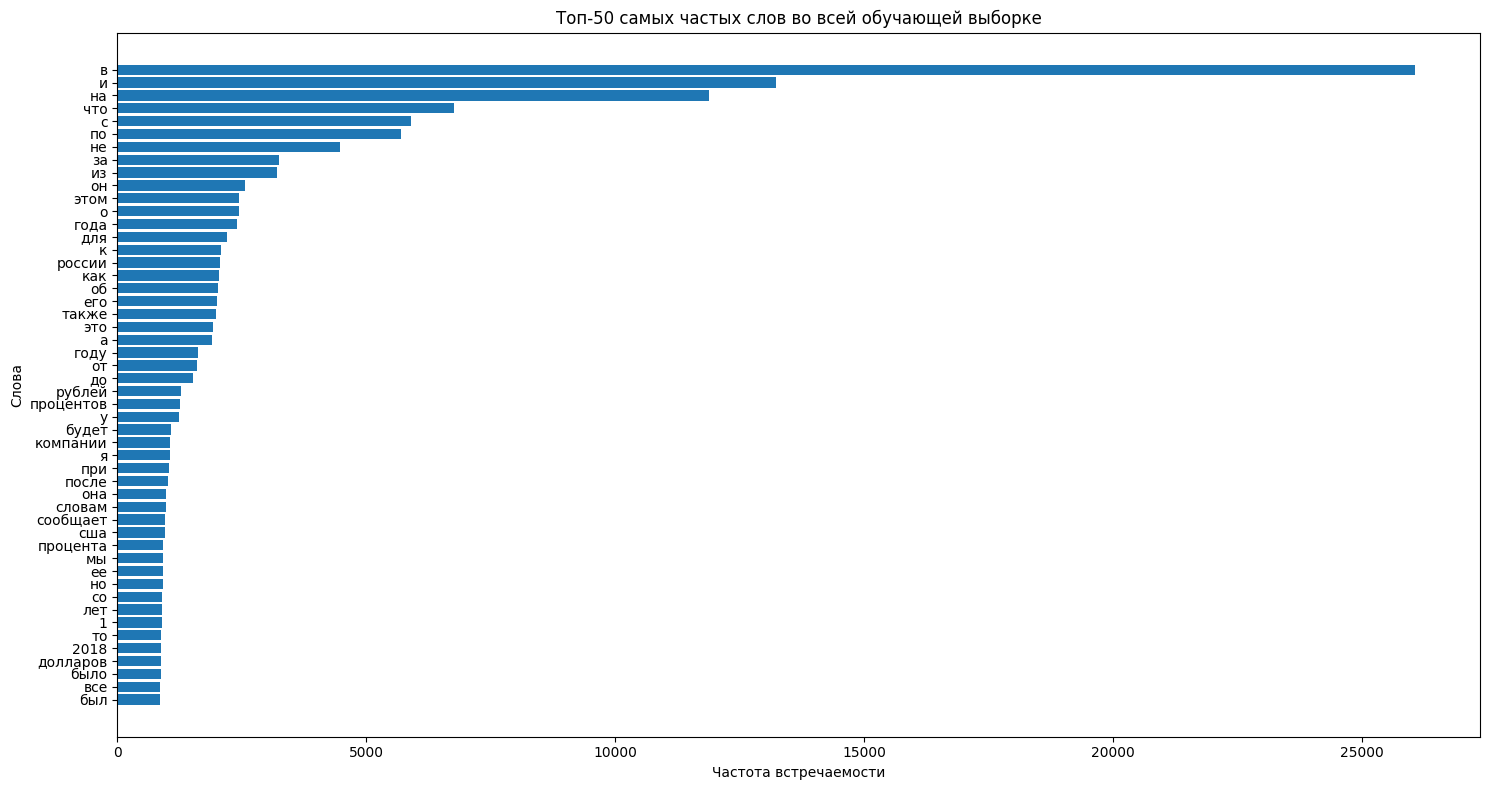

In [27]:
# Подсчет частот слов для всей обучающей выборки
all_words = []
for text in train_df['processed_text']:
    words = word_tokenize(text)
    all_words.extend(words)

overall_freq = FreqDist(all_words)
overall_top_50 = overall_freq.most_common(50)

# Создаем данные для графика
words = [item[0] for item in overall_top_50]
frequencies = [item[1] for item in overall_top_50]

# Построение графика
plt.figure(figsize=(15, 8))
plt.barh(words, frequencies)
plt.title('Топ-50 самых частых слов во всей обучающей выборке')
plt.xlabel('Частота встречаемости')
plt.ylabel('Слова')
plt.gca().invert_yaxis()  # Чтобы самые частые слова были сверху
plt.tight_layout()
plt.show()

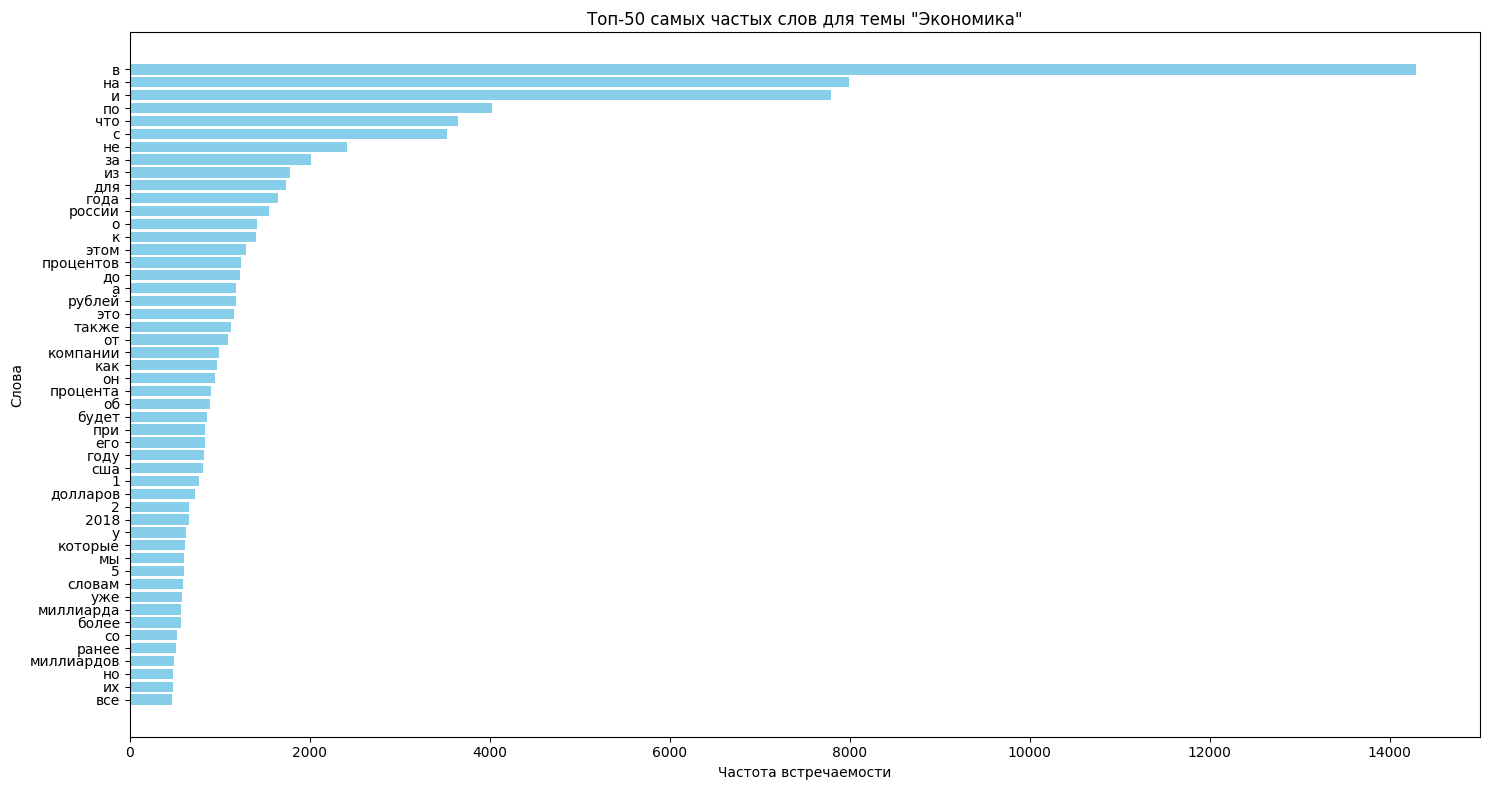

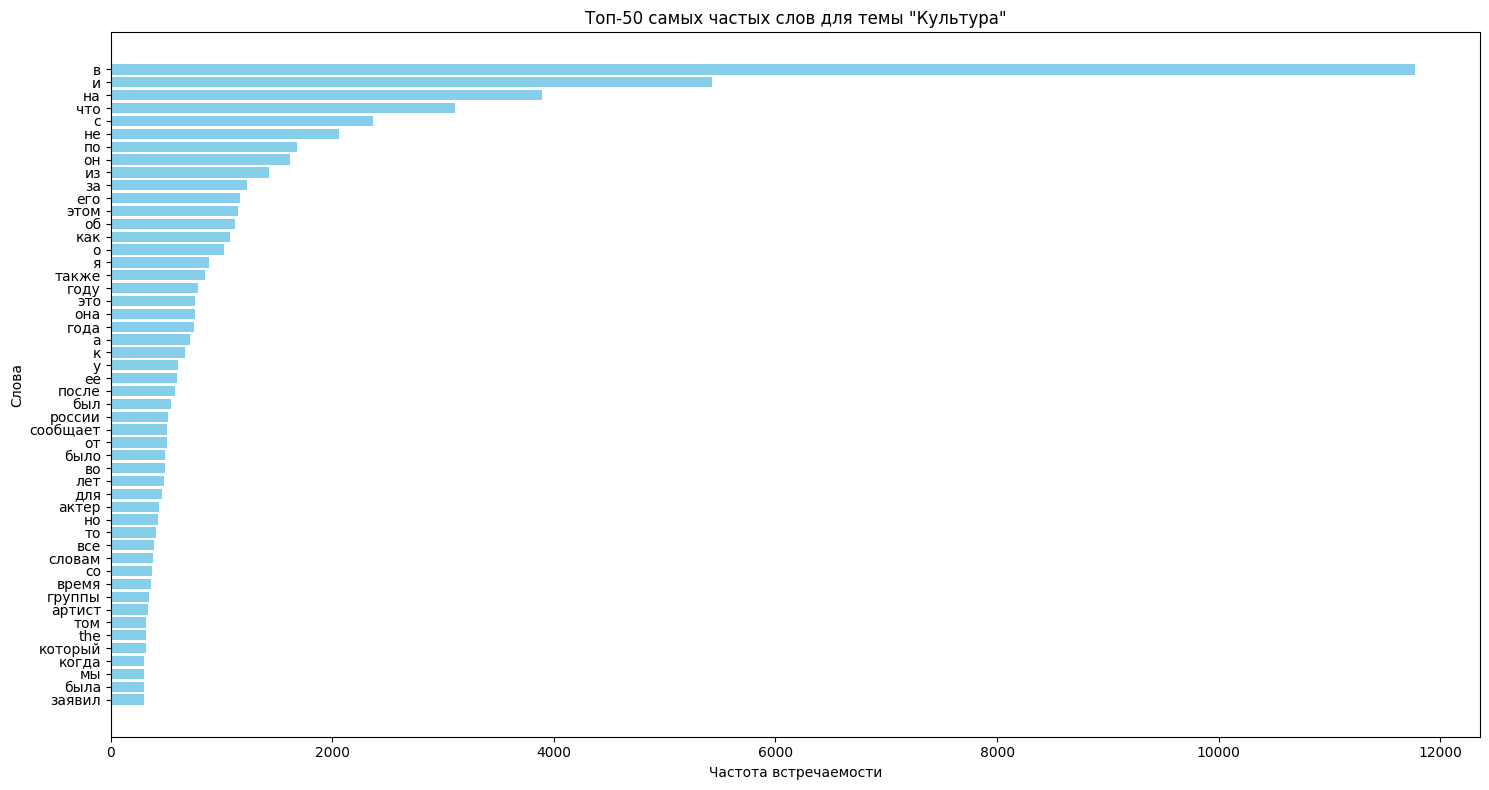

In [28]:
# Создаем графики для каждой темы
topics = train_df['topic'].unique()

for topic in topics:
    # Подсчет частот для текущей темы
    topic_texts = train_df[train_df['topic'] == topic]['processed_text']
    topic_words = []

    for text in topic_texts:
        words = word_tokenize(text)
        topic_words.extend(words)

    topic_freq = FreqDist(topic_words)
    topic_top_50 = topic_freq.most_common(50)

    # Подготовка данных для графика
    words = [item[0] for item in topic_top_50]
    frequencies = [item[1] for item in topic_top_50]

    # Построение графика
    plt.figure(figsize=(15, 8))
    plt.barh(words, frequencies, color='skyblue')
    plt.title(f'Топ-50 самых частых слов для темы "{topic}"')
    plt.xlabel('Частота встречаемости')
    plt.ylabel('Слова')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

**Задание 4.** Составьте словари из текстов `обучающей` части датасетов наболее часто встречающихся слов, которые встречаются **только в одной из каждых тем**. Постройте диаграмму для топ-`50` этих слов для каждой темы (ось X - слова, ось Y - частоты встречаемости слов в новостных текстах).

In [30]:
# Создаем словари частот для каждой темы
topics = train_df['topic'].unique()
topic_freq_dict = {}

for topic in topics:
    topic_texts = train_df[train_df['topic'] == topic]['processed_text']
    topic_words = []

    for text in topic_texts:
        words = word_tokenize(text)
        topic_words.extend(words)

    topic_freq_dict[topic] = FreqDist(topic_words)

# Находим слова, которые встречаются только в одной теме
unique_words_by_topic = {}

for target_topic in topics:
    # Берем топ-1000 слов целевой темы
    target_words = set([word for word, freq in topic_freq_dict[target_topic].most_common(1000)])

    # Собираем слова всех других тем
    other_words = set()
    for other_topic in topics:
        if other_topic != target_topic:
            other_words.update([word for word, freq in topic_freq_dict[other_topic].most_common(1000)])

    # Находим уникальные слова (есть только в целевой теме)
    unique_words = target_words - other_words

    # Создаем словарь частот для уникальных слов
    unique_freq = {}
    for word in unique_words:
        if word in topic_freq_dict[target_topic]:
            unique_freq[word] = topic_freq_dict[target_topic][word]

    # Сортируем по частоте и берем топ-50
    unique_sorted = sorted(unique_freq.items(), key=lambda x: x[1], reverse=True)[:50]
    unique_words_by_topic[target_topic] = unique_sorted

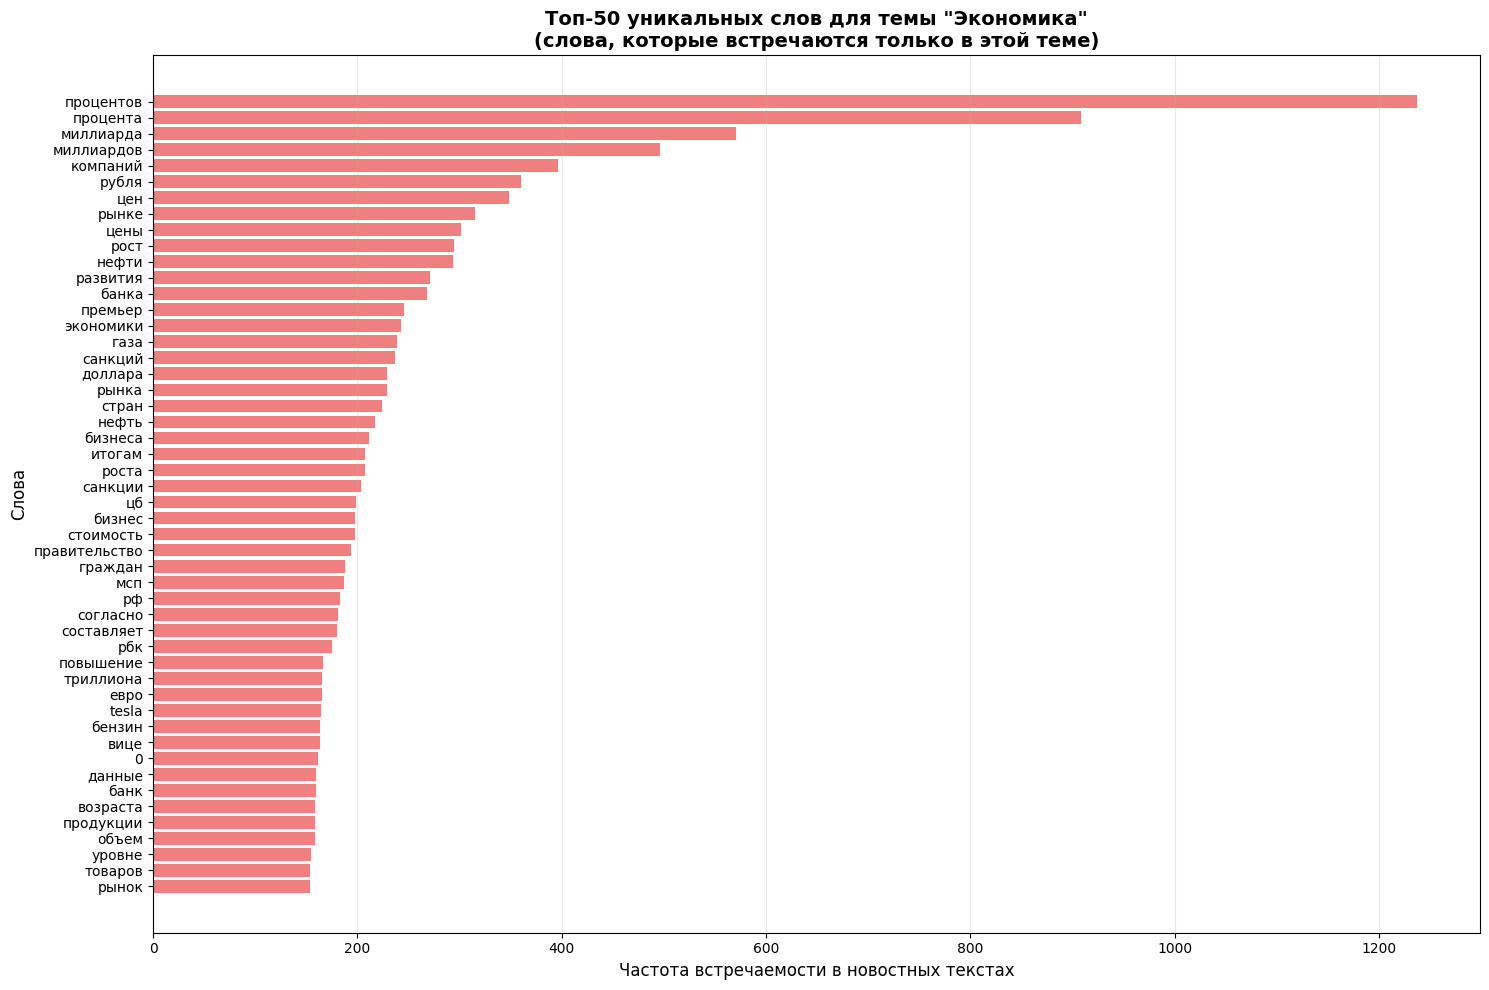

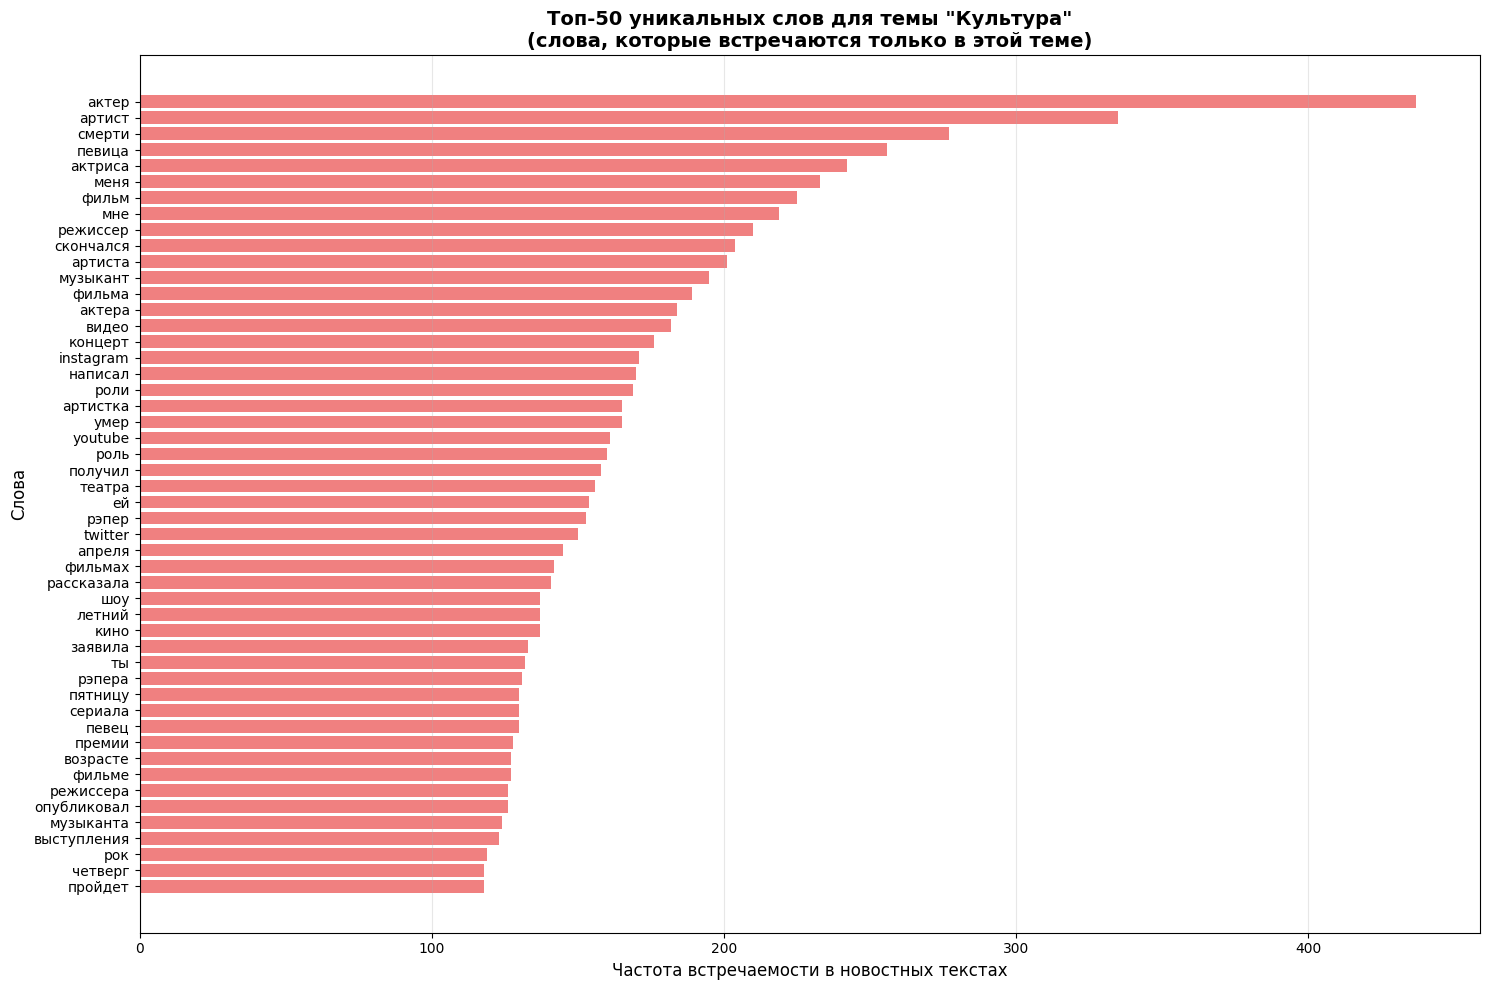

In [31]:
# Построение диаграмм для топ-50 уникальных слов каждой темы
for topic in topics:
    if topic in unique_words_by_topic and len(unique_words_by_topic[topic]) > 0:
        # Берем топ-50 уникальных слов
        top_50 = unique_words_by_topic[topic][:50]
        words = [item[0] for item in top_50]
        freqs = [item[1] for item in top_50]

        # Создаем диаграмму
        plt.figure(figsize=(15, 10))
        plt.barh(words, freqs, color='lightcoral')
        plt.title(f'Топ-50 уникальных слов для темы "{topic}"\n(слова, которые встречаются только в этой теме)',
                 fontsize=14, fontweight='bold')
        plt.xlabel('Частота встречаемости в новостных текстах', fontsize=12)
        plt.ylabel('Слова', fontsize=12)
        plt.gca().invert_yaxis()  # Чтобы самые частые слова были сверху
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

**Задание 5.** Выполните классификацию новостных текстов из `тестовой` части датасета на основе `top-k слов` (`k` - как входной параметр) из словарей, построенных в задании `4` на основе `обучающей` части датасета. Оцените показатели `полнота` и `точность` классификации (относительно значения параметра `k`) при указании количества документов, для которых не получилось определить тему.

Общий алгоритм классификации:

- Для документа `x` считаем сколько встречается слов, из словаря каждой из тем.
- Выбираем тему для документа `x` с максимальным количеством слов
- Отдельно обрабатываем случаи, когда количество слов одинаковое или равно 0. Это случаи, когда не получилось определить тему документа.

In [37]:
# Шаг 1: Создаем словари top-k слов для каждой темы
k = 30  # можно менять это значение
topic_dicts = {}

for topic in topics:
    if topic in unique_words_by_topic:
        # Берем только top-k слов из словаря темы
        topic_dicts[topic] = [word for word, freq in unique_words_by_topic[topic][:k]]

print("Словари для классификации созданы!")

# Шаг 2: Функция классификации (алгоритм)
def classify_simple(text, topic_dicts):
    words = word_tokenize(text.lower())

    # Считаем сколько слов из каждого словаря встречается в тексте
    scores = {}
    for topic, topic_words in topic_dicts.items():
        count = 0
        for word in topic_words:
            if word in words:
                count += 1
        scores[topic] = count

    # Находим максимальное количество совпадений
    max_score = max(scores.values())

    # Случай 1: если максимальный счет = 0 - не определяем тему
    if max_score == 0:
        return 'не определена'

    # Случай 2: если несколько тем имеют максимальный счет - не определяем тему
    max_topics = []
    for topic, score in scores.items():
        if score == max_score:
            max_topics.append(topic)

    if len(max_topics) > 1:
        return 'не определена'

    # Случай 3: есть одна тема с максимальным счетом
    return max_topics[0]

# Шаг 3: Классифицируем тексты из тестовой выборки
print("\nРезультаты классификации:")
correct = 0
unknown = 0
total = len(test_df)

for i, row in test_df.iterrows():
    true_topic = row['topic']
    text = row['processed_text']

    # ВЫЗОВ КЛАССИФИКАТОРА - здесь применяется наш алгоритм
    predicted_topic = classify_simple(text, topic_dicts)

    # Подсчет результатов
    if predicted_topic == 'не определена':
        unknown += 1
    elif predicted_topic == true_topic:
        correct += 1

# Шаг 4: Вычисляем метрики
accuracy = correct / total
defined_count = total - unknown
precision = correct / defined_count if defined_count > 0 else 0

print(f"Всего текстов: {total}")
print(f"Правильно классифицировано: {correct}")
print(f"Не удалось классифицировать: {unknown}")
print(f"Точность: {accuracy:.3f}")
print(f"Полнота: {precision:.3f}")

Словари для классификации созданы!

Результаты классификации:
Всего текстов: 800
Правильно классифицировано: 699
Не удалось классифицировать: 82
Точность: 0.874
Полнота: 0.974


In [38]:
print("\nПримеры работы классификатора:")
print("=" * 50)

for i in range(3):  # Покажем на 3 примерах
    row = test_df.iloc[i]
    text = row['processed_text']
    true_topic = row['topic']

    # Снова вызываем классификатор, но теперь с подробным выводом
    words = word_tokenize(text.lower())
    scores = {}

    print(f"\nПример {i+1}:")
    print(f"Истинная тема: {true_topic}")

    for topic, topic_words in topic_dicts.items():
        count = 0
        found_words = []
        for word in topic_words:
            if word in words:
                count += 1
                found_words.append(word)
        scores[topic] = count
        print(f"  Тема '{topic}': {count} совпадений ({', '.join(found_words[:5])}...)")

    max_score = max(scores.values())
    max_topics = [topic for topic, score in scores.items() if score == max_score]

    if max_score == 0:
        print("Результат: тема не определена (максимальный счет = 0)")
    elif len(max_topics) > 1:
        print(f"Результат: тема не определена (несколько тем с счетом {max_score})")
    else:
        print(f"Результат: определена тема '{max_topics[0]}'")
        print(f"Совпадение с истинной темой: {'ДА' if max_topics[0] == true_topic else 'НЕТ'}")


Примеры работы классификатора:

Пример 1:
Истинная тема: Экономика
  Тема 'Экономика': 12 совпадений (процентов, миллиарда, миллиардов, рубля, цен...)
  Тема 'Культура': 0 совпадений (...)
Результат: определена тема 'Экономика'
Совпадение с истинной темой: ДА

Пример 2:
Истинная тема: Экономика
  Тема 'Экономика': 3 совпадений (миллиарда, цены, роста...)
  Тема 'Культура': 0 совпадений (...)
Результат: определена тема 'Экономика'
Совпадение с истинной темой: ДА

Пример 3:
Истинная тема: Культура
  Тема 'Экономика': 0 совпадений (...)
  Тема 'Культура': 7 совпадений (актер, фильм, режиссер, артиста, актера...)
Результат: определена тема 'Культура'
Совпадение с истинной темой: ДА


**Задание 6.** Познакомьтесь с библиотекой Natasha для обработки текстов на русском языке, прочитав <a href="https://habr.com/ru/articles/516098/">статью</a>.

#### Импорт библиотек и создание объекта для работы с текстом
Импортируйте библиотеки для сегментации на предложения, морфологического и синтаксического анализа.

```python
from natasha import(
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    Doc,
)
```

Создайте объект из обрабатываемого текста `text`:

```python
text_doc = Doc(text)
```

In [40]:
# Устанавливаем библиотеку Natasha
!pip install natasha


In [41]:
from natasha import(
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    Doc,
)

In [44]:
# Создаем объекты для обработки
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)

In [46]:
# Берем текст из датасета (первая новость)
text = news.iloc[0]['text']

# Создаем объект документа
text_doc = Doc(text)

#### Сегментация на предложения
Создайте объект, который будет выполнять сегментацию текста на предложения:

```python
segmenter = Segmenter()
```

С помощью сегментатора можно разбить текст на предложения и токены:

```python
text_doc.segment(segmenter)
print(text_doc.tokens)
print(text_doc.sents)
```

In [47]:
# Сегментация на предложения и токены
text_doc.segment(segmenter)
print("Токены:", text_doc.tokens[:10])  # первые 10 токенов
print("Предложения:", len(text_doc.sents))

Токены: [DocToken(stop=9, text='Президент'), DocToken(start=10, stop=16, text='России'), DocToken(start=17, stop=25, text='Владимир'), DocToken(start=26, stop=31, text='Путин'), DocToken(start=31, stop=32, text=','), DocToken(start=33, stop=41, text='выступая'), DocToken(start=42, stop=44, text='на'), DocToken(start=45, stop=54, text='заседании'), DocToken(start=55, stop=61, text='Совета'), DocToken(start=62, stop=64, text='по')]
Предложения: 10


#### Морфологический анализ

Инициализируйте словарь и морфологический анализатор:
```python
morph_vocab = MorphVocab()
morph_tagger = NewsMorphTagger(emb)
```

Чтобы получить морфологическую разметку слова `word` воспользуйтесь:

```python
morph_vocab.parse(word)
```

Добавить морфологическую разметку к объекту обрабатываемого текста (Doc) можно как

```python
text_doc.tag_morph(morph_tagger)
print(text_doc.tokens)
text_doc.sents[0].morph.print()
```

Получить леммы текста можно через метод `lemmatize`:

```python
for token in text_doc.tokens:
    token.lemmatize(morph_vocab)
{_.text: _.lemma for _ in text_doc.tokens}
```

In [48]:
# Морфологический анализ
text_doc.tag_morph(morph_tagger)
text_doc.sents[0].morph.print()

           Президент NOUN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
              России PROPN|Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing
            Владимир PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
               Путин PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
                   , PUNCT
            выступая VERB|Aspect=Imp|Tense=Pres|VerbForm=Conv|Voice=Act
                  на ADP
           заседании NOUN|Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing
              Совета PROPN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                  по ADP
            культуре NOUN|Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing
                   и CCONJ
           искусству NOUN|Animacy=Inan|Case=Dat|Gender=Neut|Number=Sing
                   , PUNCT
              назвал VERB|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
   бесперспективными ADJ|Case=Ins|Degree=Pos|Number=Plur
        участившиеся VERB|Animacy=Inan|Aspect=Perf|Case=A

In [49]:
# Лемматизация
for token in text_doc.tokens:
    token.lemmatize(morph_vocab)

# Выводим леммы
lemmas = {_.text: _.lemma for _ in text_doc.tokens}
print("Леммы:", list(lemmas.items())[:10])  # первые 10 лемм

Леммы: [('Президент', 'президент'), ('России', 'россия'), ('Владимир', 'владимир'), ('Путин', 'путин'), (',', ','), ('выступая', 'выступать'), ('на', 'на'), ('заседании', 'заседание'), ('Совета', 'совет'), ('по', 'по')]


**Задание 7.** Добавьте столбец в обучающую и тестовую часть датасета с обработанными текстами после лемматизации.

In [50]:
# Функция для лемматизации текста
def lemmatize_text(text):
    # Создаем объект документа
    doc = Doc(text)

    # Сегментируем на токены
    doc.segment(segmenter)

    # Морфологический анализ
    doc.tag_morph(morph_tagger)

    # Лемматизация
    lemmas = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        lemmas.append(token.lemma)

    # Объединяем леммы обратно в текст
    return ' '.join(lemmas)

# Применяем лемматизацию к обучающей выборке
print("Лемматизация обучающей выборки...")
train_df['lemmatized_text'] = train_df['processed_text'].apply(lemmatize_text)

# Применяем лемматизацию к тестовой выборке
print("Лемматизация тестовой выборки...")
test_df['lemmatized_text'] = test_df['processed_text'].apply(lemmatize_text)

# Проверяем результат
print("\nРезультат лемматизации:")
print("Обучающая выборка:")
print(train_df[['processed_text', 'lemmatized_text']].head(2))
print("\nТестовая выборка:")
print(test_df[['processed_text', 'lemmatized_text']].head(2))

Лемматизация обучающей выборки...
Лемматизация тестовой выборки...

Результат лемматизации:
Обучающая выборка:
                                         processed_text  \
3719  президент украины петр порошенко потребовал от...   
358   киноцентр соловей на красной пресне перестроят...   

                                        lemmatized_text  
3719  президент украина петр порошенко потребовать о...  
358   киноцентр соловей на красный пресня перестроят...  

Тестовая выборка:
                                         processed_text  \
3743  опережающее восстановление добычи в рамках опе...   
2725  международный валютный фонд мвф и власти украи...   

                                        lemmatized_text  
3743  опережать восстановление добыча в рамка опек и...  
2725  международный валютный фонд мвф и власть украи...  


**Задание 8.** Составьте словари на основе текстов `обучающей` части датасета по аналогии с **заданием 4.**, но с текстами, полученными после лемматзации.

Словари на основе лемматизированных текстов созданы!


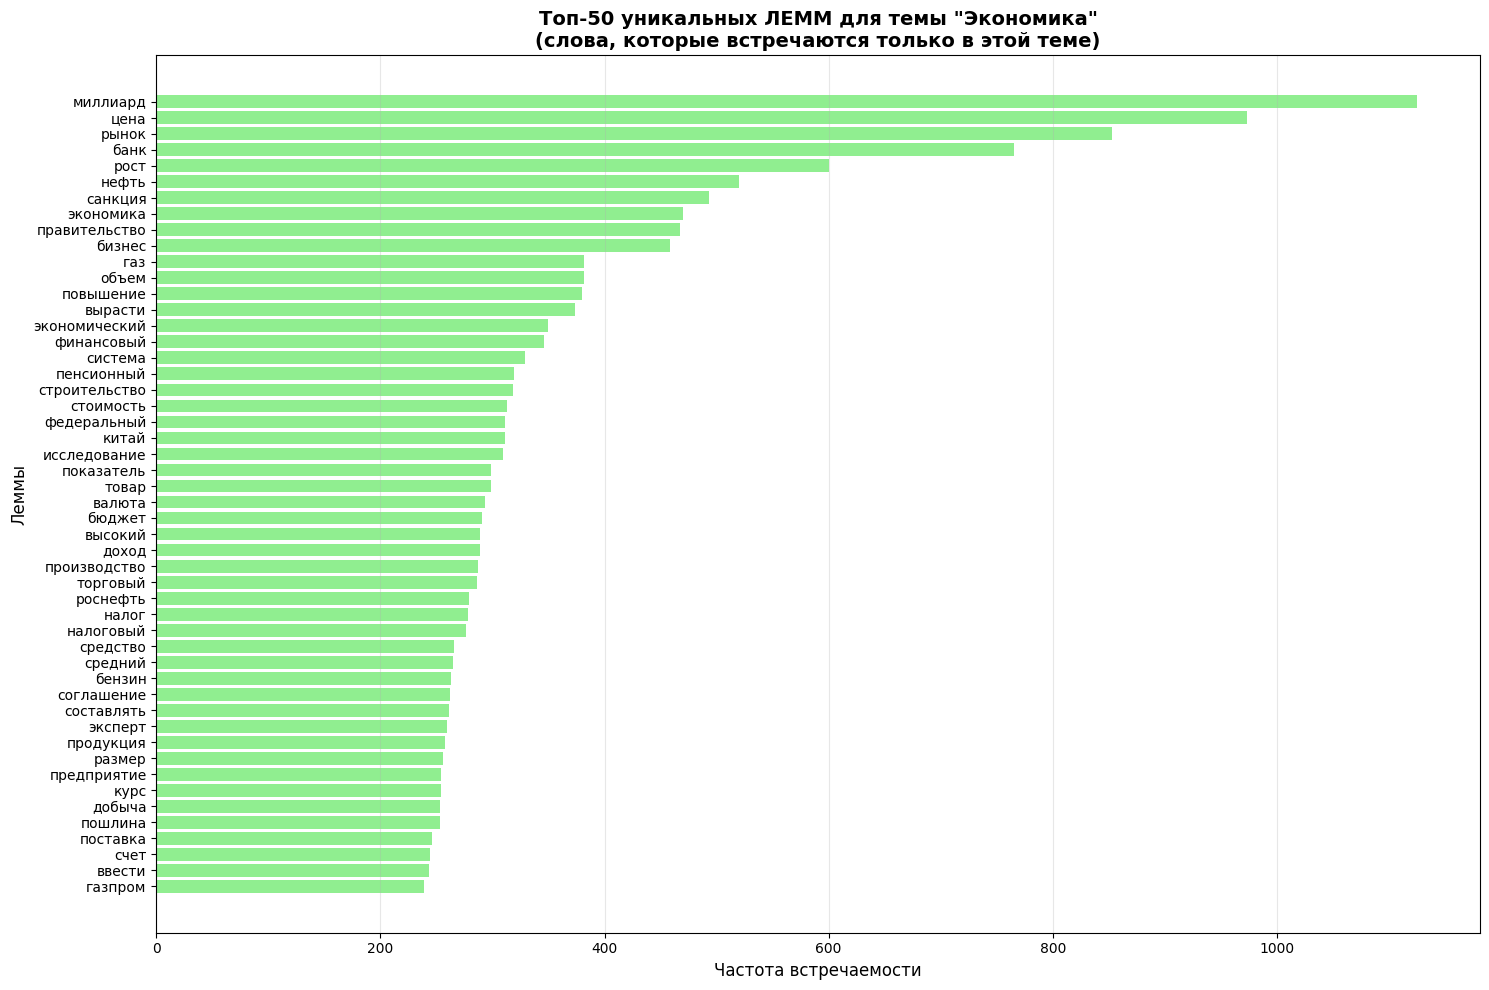

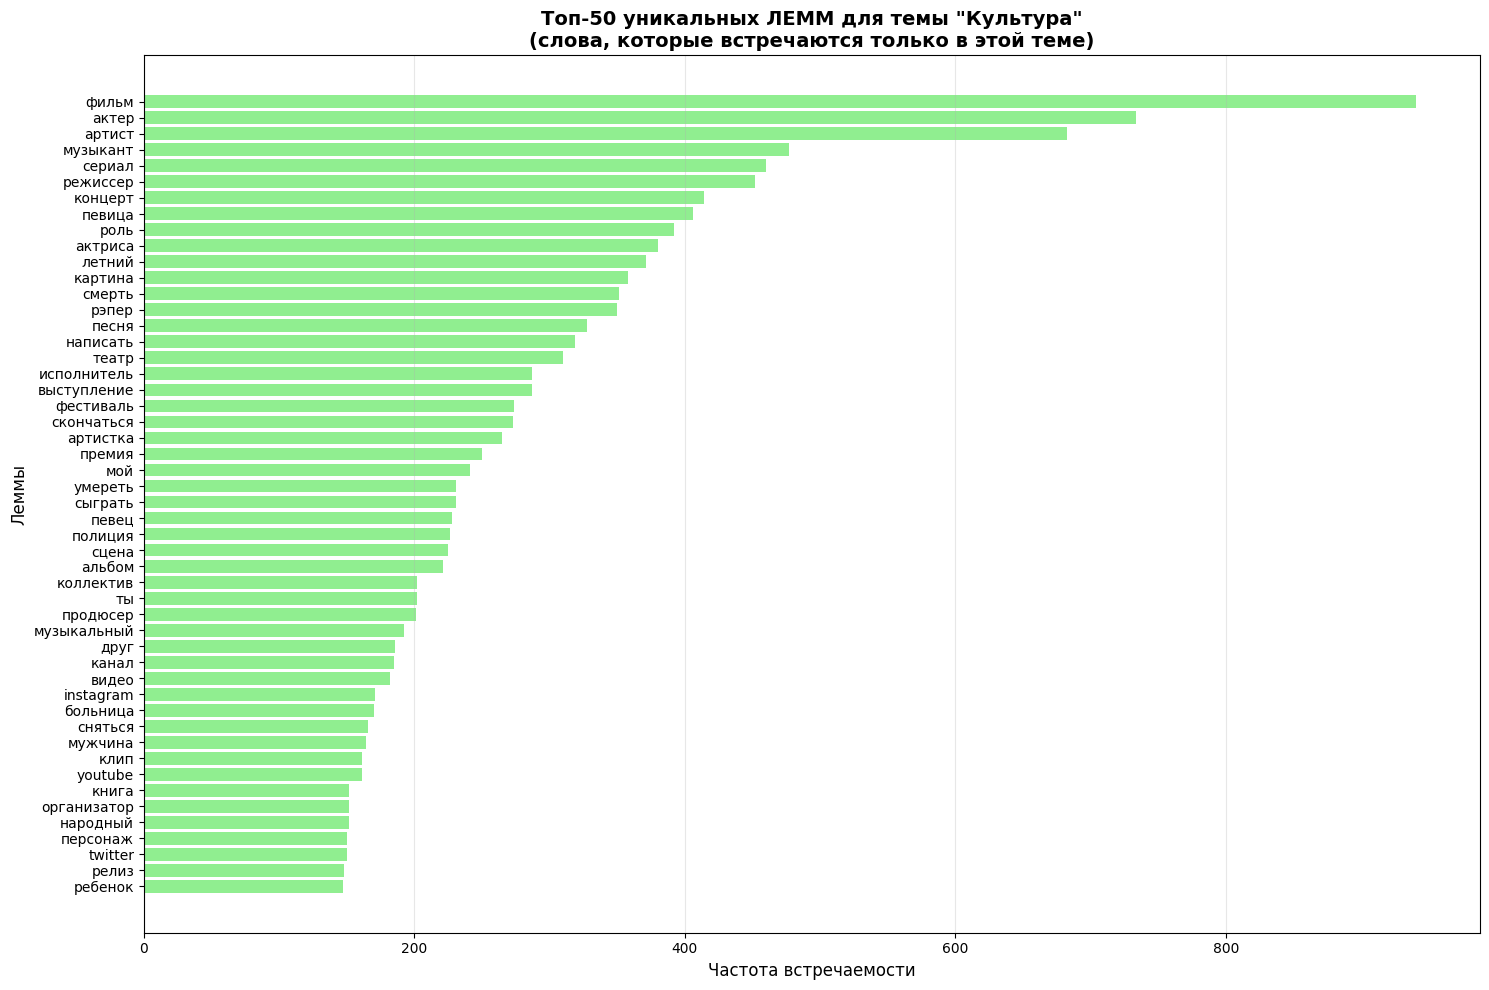


Тема: Экономика
Топ-10 уникальных лемм:
1. миллиард - 1125 раз
2. цена - 973 раз
3. рынок - 853 раз
4. банк - 765 раз
5. рост - 600 раз
6. нефть - 520 раз
7. санкция - 493 раз
8. экономика - 470 раз
9. правительство - 467 раз
10. бизнес - 458 раз

Тема: Культура
Топ-10 уникальных лемм:
1. фильм - 941 раз
2. актер - 734 раз
3. артист - 683 раз
4. музыкант - 477 раз
5. сериал - 460 раз
6. режиссер - 452 раз
7. концерт - 414 раз
8. певица - 406 раз
9. роль - 392 раз
10. актриса - 380 раз


In [51]:
# Создаем словари частот для каждой темы из лемматизированных текстов
topics = train_df['topic'].unique()
topic_freq_dict_lemmatized = {}

for topic in topics:
    # Берем лемматизированные тексты для текущей темы
    topic_texts = train_df[train_df['topic'] == topic]['lemmatized_text']
    topic_words = []

    for text in topic_texts:
        # Разбиваем на слова (уже лемматизированные)
        words = text.split()
        topic_words.extend(words)

    topic_freq_dict_lemmatized[topic] = FreqDist(topic_words)

# Находим слова, которые встречаются только в одной теме (лемматизированные)
unique_words_by_topic_lemmatized = {}

for target_topic in topics:
    # Берем топ-1000 слов целевой темы
    target_words = set([word for word, freq in topic_freq_dict_lemmatized[target_topic].most_common(1000)])

    # Собираем слова всех других тем
    other_words = set()
    for other_topic in topics:
        if other_topic != target_topic:
            other_words.update([word for word, freq in topic_freq_dict_lemmatized[other_topic].most_common(1000)])

    # Находим уникальные слова (есть только в целевой теме)
    unique_words = target_words - other_words

    # Создаем словарь частот для уникальных слов
    unique_freq = {}
    for word in unique_words:
        if word in topic_freq_dict_lemmatized[target_topic]:
            unique_freq[word] = topic_freq_dict_lemmatized[target_topic][word]

    # Сортируем по частоте и берем топ-50
    unique_sorted = sorted(unique_freq.items(), key=lambda x: x[1], reverse=True)[:50]
    unique_words_by_topic_lemmatized[target_topic] = unique_sorted

print("Словари на основе лемматизированных текстов созданы!")

# Построение диаграмм для топ-50 уникальных слов каждой темы (лемматизированные)
for topic in topics:
    if topic in unique_words_by_topic_lemmatized and len(unique_words_by_topic_lemmatized[topic]) > 0:
        # Берем топ-50 уникальных слов
        top_50 = unique_words_by_topic_lemmatized[topic][:50]
        words = [item[0] for item in top_50]
        freqs = [item[1] for item in top_50]

        # Создаем диаграмму
        plt.figure(figsize=(15, 10))
        plt.barh(words, freqs, color='lightgreen')
        plt.title(f'Топ-50 уникальных ЛЕММ для темы "{topic}"\n(слова, которые встречаются только в этой теме)',
                 fontsize=14, fontweight='bold')
        plt.xlabel('Частота встречаемости', fontsize=12)
        plt.ylabel('Леммы', fontsize=12)
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Покажем несколько примеров из словарей
for topic in topics:
    if topic in unique_words_by_topic_lemmatized:
        print(f"\nТема: {topic}")
        print("Топ-10 уникальных лемм:")
        for i, (word, freq) in enumerate(unique_words_by_topic_lemmatized[topic][:10], 1):
            print(f"{i}. {word} - {freq} раз")

**Задание 9.** Сделайте классификацию новостных текстов `тестовой` части датасета по аналогии с **заданием 5.**, но с текстами, полученными **после лемматзации**.

In [52]:
# Шаг 1: Создаем словари top-k лемм для каждой темы
k = 30  # можно менять это значение
topic_dicts_lemmatized = {}

for topic in topics:
    if topic in unique_words_by_topic_lemmatized:
        # Берем только top-k лемм из словаря темы
        topic_dicts_lemmatized[topic] = [word for word, freq in unique_words_by_topic_lemmatized[topic][:k]]

print("Словари лемм для классификации созданы!")

# Шаг 2: Функция классификации для лемматизированных текстов
def classify_lemmatized(text, topic_dicts):
    # Разбиваем текст на леммы (просто split, так как это уже лемматизированный текст)
    lemmas = text.split()

    # Считаем сколько лемм из каждого словаря встречается в тексте
    scores = {}
    for topic, topic_lemmas in topic_dicts.items():
        count = 0
        for lemma in topic_lemmas:
            if lemma in lemmas:
                count += 1
        scores[topic] = count

    # Находим максимальное количество совпадений
    max_score = max(scores.values())

    # Случай 1: если максимальный счет = 0 - не определяем тему
    if max_score == 0:
        return 'не определена'

    # Случай 2: если несколько тем имеют максимальный счет - не определяем тему
    max_topics = []
    for topic, score in scores.items():
        if score == max_score:
            max_topics.append(topic)

    if len(max_topics) > 1:
        return 'не определена'

    # Случай 3: есть одна тема с максимальным счетом
    return max_topics[0]

# Шаг 3: Классифицируем лемматизированные тексты из тестовой выборки
print("\nРезультаты классификации с лемматизацией:")
correct_lemmatized = 0
unknown_lemmatized = 0
total_lemmatized = len(test_df)

for i, row in test_df.iterrows():
    true_topic = row['topic']
    lemmatized_text = row['lemmatized_text']

    # Классифицируем по лемматизированному тексту
    predicted_topic = classify_lemmatized(lemmatized_text, topic_dicts_lemmatized)

    # Подсчет результатов
    if predicted_topic == 'не определена':
        unknown_lemmatized += 1
    elif predicted_topic == true_topic:
        correct_lemmatized += 1

# Шаг 4: Вычисляем метрики для лемматизированной классификации
accuracy_lemmatized = correct_lemmatized / total_lemmatized
defined_count_lemmatized = total_lemmatized - unknown_lemmatized
precision_lemmatized = correct_lemmatized / defined_count_lemmatized if defined_count_lemmatized > 0 else 0

print(f"Всего текстов: {total_lemmatized}")
print(f"Правильно классифицировано: {correct_lemmatized}")
print(f"Не удалось классифицировать: {unknown_lemmatized}")
print(f"Точность: {accuracy_lemmatized:.3f}")
print(f"Полнота: {precision_lemmatized:.3f}")

# Сравнение с обычной классификацией (из задания 5)
print("\n" + "="*50)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("="*50)
print(f"БЕЗ лемматизации: Точность = 0.874, Полнота = 0.974")
print(f"С лемматизацией:  Точность = {accuracy_lemmatized:.3f}, Полнота = {precision_lemmatized:.3f}")

# Шаг 5: Покажем примеры работы классификатора
print("\nПримеры работы классификатора с лемматизацией:")
print("="*60)

for i in range(3):  # Покажем на 3 примерах
    row = test_df.iloc[i]
    lemmatized_text = row['lemmatized_text']
    true_topic = row['topic']

    # Подробный вывод для примера
    lemmas = lemmatized_text.split()
    scores = {}

    print(f"\nПример {i+1}:")
    print(f"Истинная тема: {true_topic}")

    for topic, topic_lemmas in topic_dicts_lemmatized.items():
        count = 0
        found_lemmas = []
        for lemma in topic_lemmas:
            if lemma in lemmas:
                count += 1
                found_lemmas.append(lemma)
        scores[topic] = count
        print(f"  Тема '{topic}': {count} совпадений ({', '.join(found_lemmas[:5])}...)")

    max_score = max(scores.values())
    max_topics = [topic for topic, score in scores.items() if score == max_score]

    if max_score == 0:
        print("Результат: тема не определена (максимальный счет = 0)")
    elif len(max_topics) > 1:
        print(f"Результат: тема не определена (несколько тем с счетом {max_score})")
    else:
        print(f"Результат: определена тема '{max_topics[0]}'")
        print(f"Совпадение с истинной темой: {'ДА' if max_topics[0] == true_topic else 'НЕТ'}")

Словари лемм для классификации созданы!

Результаты классификации с лемматизацией:
Всего текстов: 800
Правильно классифицировано: 758
Не удалось классифицировать: 26
Точность: 0.948
Полнота: 0.979

СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
БЕЗ лемматизации: Точность = 0.874, Полнота = 0.974
С лемматизацией:  Точность = 0.948, Полнота = 0.979

Примеры работы классификатора с лемматизацией:

Пример 1:
Истинная тема: Экономика
  Тема 'Экономика': 11 совпадений (миллиард, цена, рынок, банк, рост...)
  Тема 'Культура': 0 совпадений (...)
Результат: определена тема 'Экономика'
Совпадение с истинной темой: ДА

Пример 2:
Истинная тема: Экономика
  Тема 'Экономика': 7 совпадений (миллиард, цена, рост, газ, повышение...)
  Тема 'Культура': 0 совпадений (...)
Результат: определена тема 'Экономика'
Совпадение с истинной темой: ДА

Пример 3:
Истинная тема: Культура
  Тема 'Экономика': 0 совпадений (...)
  Тема 'Культура': 7 совпадений (фильм, актер, артист, режиссер, картина...)
Результат: определена тема 'Культура'
